In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import os

In [2]:
os.chdir(r'E:\New folder')

In [3]:
telecom_cust = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
telecom_cust.shape

(7043, 21)

In [5]:
telecom_cust.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [6]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
#Removing missing values 
telecom_cust.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = telecom_cust.drop('customerID',axis=1)
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


# EDA(Exploratory Data Analysis)

In [10]:
#eda is used to show the relationship between different variables 

In [11]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot: >

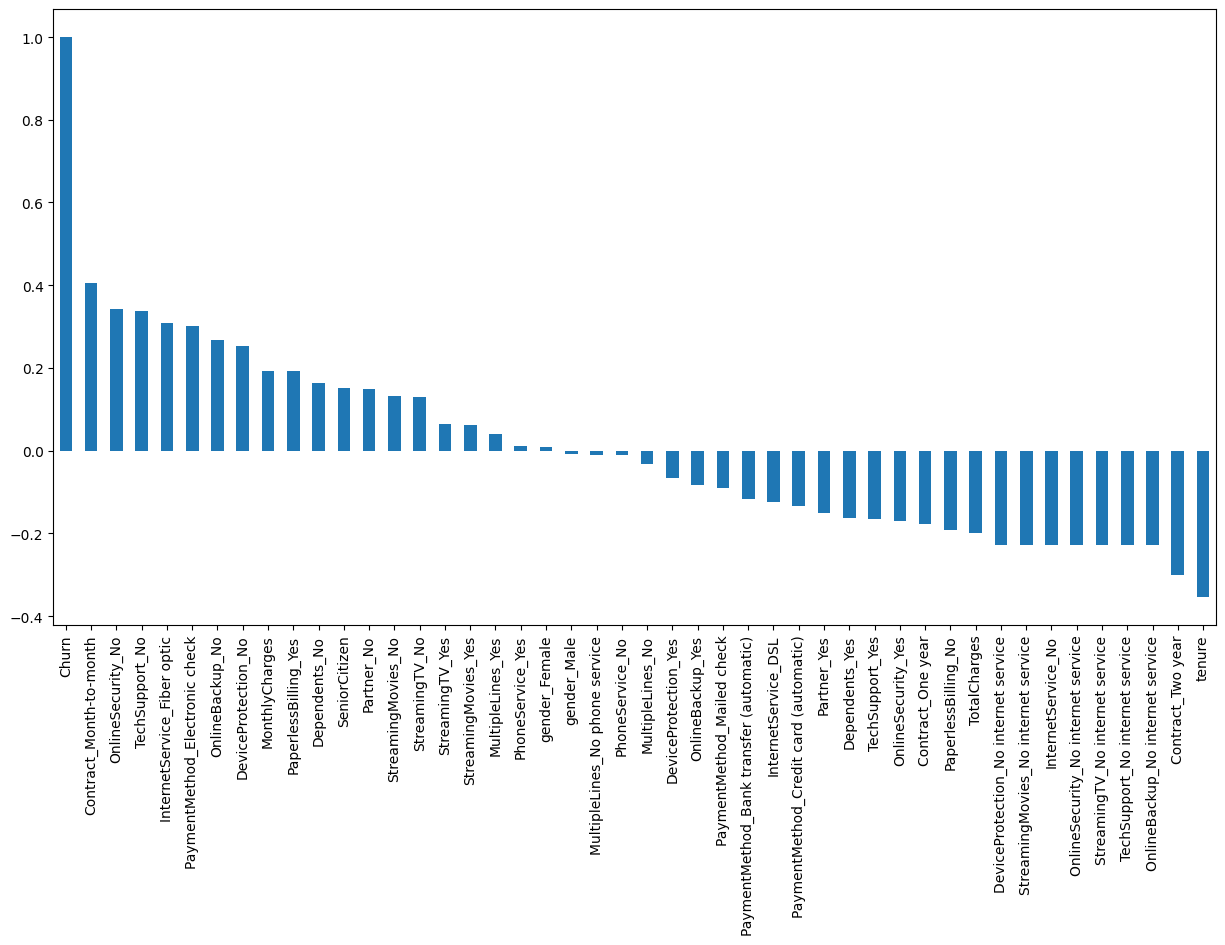

In [12]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [13]:
telecom_cust.index #for the index of the rows

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7033, 7034, 7035, 7036, 7037, 7038, 7039, 7040, 7041, 7042],
           dtype='int64', length=7032)

In [14]:
telecom_cust.columns #for the names of the columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
#to print value count for each column in the given excel sheet

for column in telecom_cust.columns:
    print('For Column: ',column)
    print(telecom_cust[column].value_counts()*100.0 /len(telecom_cust))

For Column:  customerID
7590-VHVEG    0.014221
0265-PSUAE    0.014221
2956-GGUCQ    0.014221
6008-NAIXK    0.014221
5956-YHHRX    0.014221
                ...   
7874-ECPQJ    0.014221
9796-MVYXX    0.014221
2637-FKFSY    0.014221
1552-AAGRX    0.014221
3186-AJIEK    0.014221
Name: customerID, Length: 7032, dtype: float64
For Column:  gender
Male      50.469283
Female    49.530717
Name: gender, dtype: float64
For Column:  SeniorCitizen
0    83.759954
1    16.240046
Name: SeniorCitizen, dtype: float64
For Column:  Partner
No     51.749147
Yes    48.250853
Name: Partner, dtype: float64
For Column:  Dependents
No     70.150739
Yes    29.849261
Name: Dependents, dtype: float64
For Column:  tenure
1     8.717292
72    5.147895
2     3.384528
3     2.844141
4     2.502844
        ...   
38    0.839022
28    0.810580
39    0.796359
44    0.725256
36    0.711035
Name: tenure, Length: 72, dtype: float64
For Column:  PhoneService
Yes    90.32992
No      9.67008
Name: PhoneService, dtype: float64

In [16]:
telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)

Male      50.469283
Female    49.530717
Name: gender, dtype: float64

Text(0.5, 1.0, 'Gender Distribution')

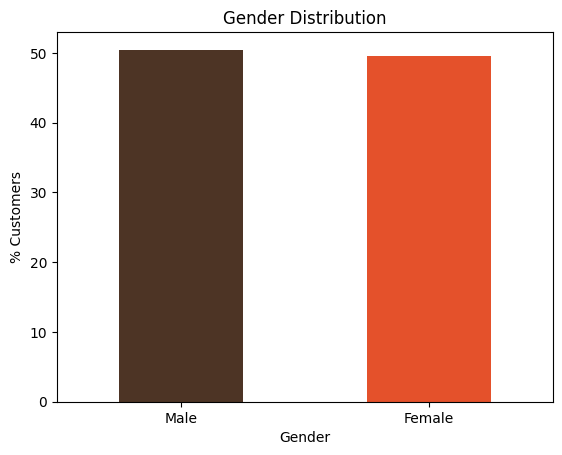

In [17]:
## Gender Distribution - About half of the customers in our data set are male while the other half are female
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)

ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

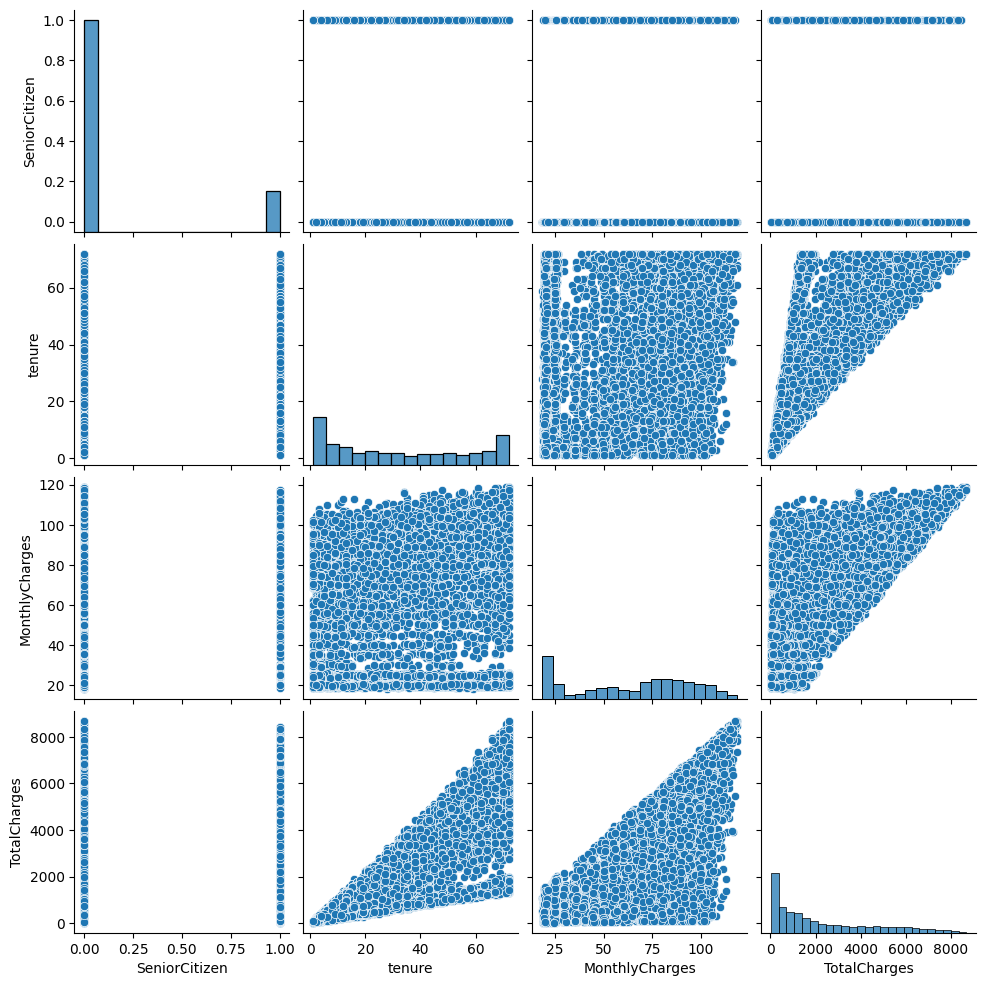

In [18]:
sns.pairplot(telecom_cust)# plot pairplot(pair plot is in seaborn,sns)
plt.show()# display the plot

<function matplotlib.pyplot.show(close=None, block=None)>

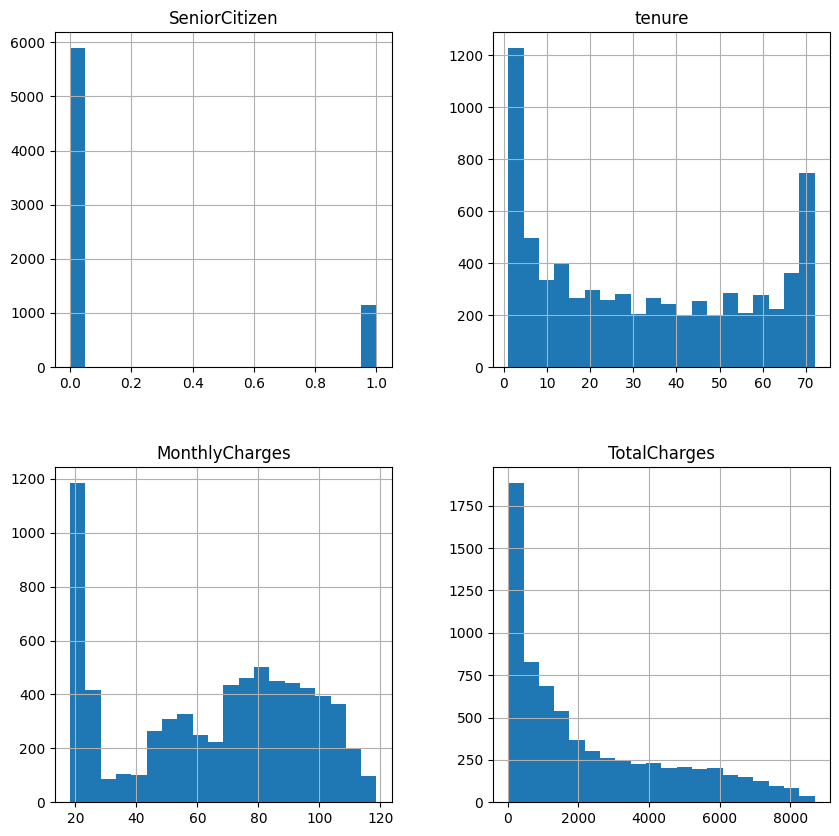

In [19]:
telecom_cust.hist(bins=20,figsize=(10,10))# plot histogram in the package matplotlib(bins is the size of the x-axis on the graph)
plt.show # to display the graph

Text(0.5, 1.0, '% of Senior Citizens')

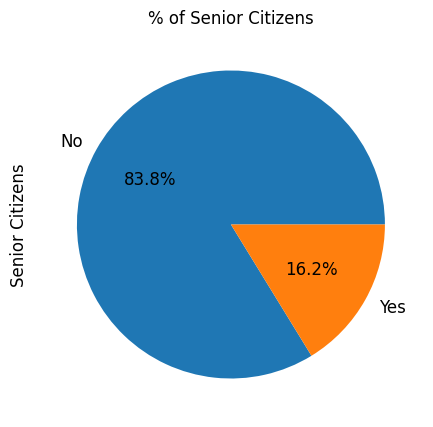

In [20]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

C:\Users\divi7\AppData\Local\Temp\ipykernel_10072\2715800857.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False,


Text(0.5, 1.0, '# of Customers by their tenure')

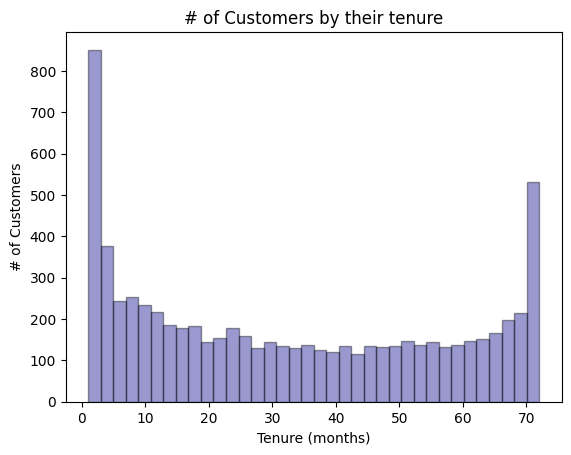

In [21]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, '# of Customers by Contract Type')

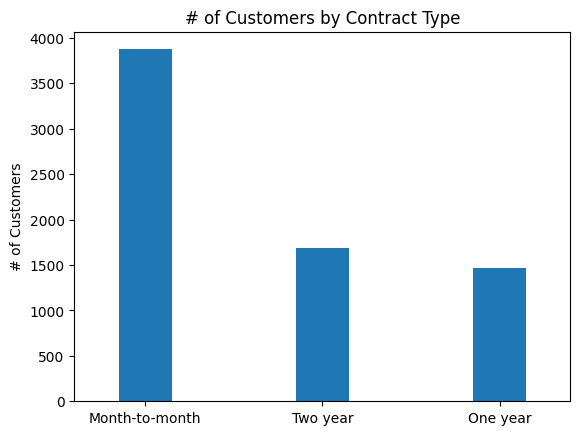

In [22]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Text(0.5, 1.0, 'Churn Rate')

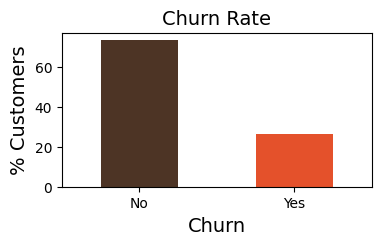

In [23]:
colors = ['#4D3425','#E4512B']
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (4,2))
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

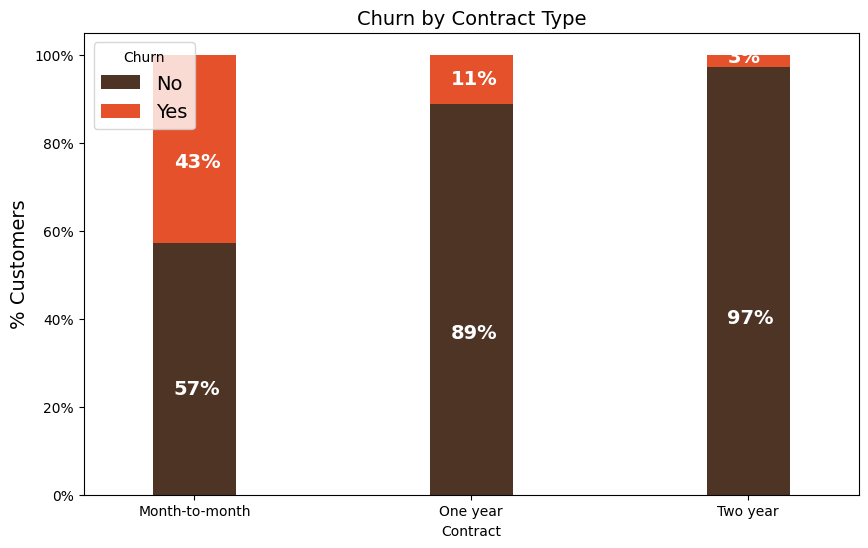

In [24]:
colors = ['#4D3425','#E4512B']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

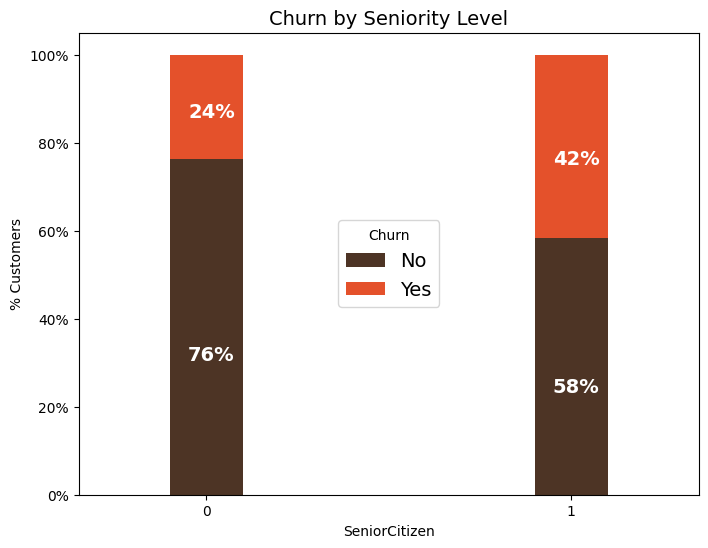

In [25]:
colors = ['#4D3425','#E4512B']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

# Model Building

In [26]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [27]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

C:\Users\divi7\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8088130774697939


In [29]:
from sklearn.metrics import precision_score,recall_score

In [30]:
precision_score(y_test, prediction_test)

0.6641221374045801

In [31]:
recall_score(y_test, prediction_test)

0.49014084507042255

<AxesSubplot: >

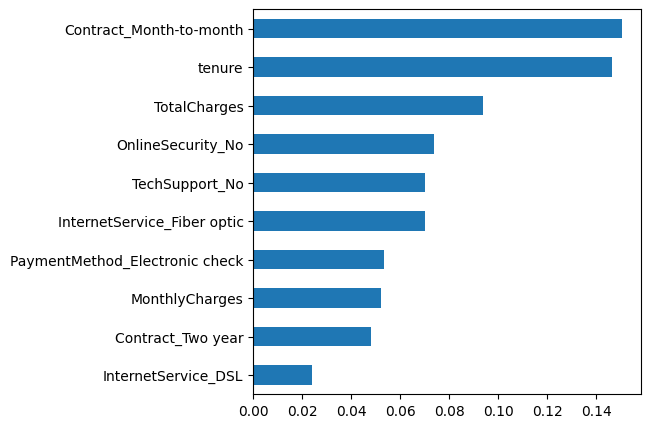

In [32]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
plt.figure(figsize=(5,5))
weights.sort_values()[-10:].plot(kind = 'barh',)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(prediction_test,y_test)

array([[964, 181],
       [ 88, 174]], dtype=int64)

In [36]:
model_rf.predict(X_test) #to get the prediction in either 0 or 1

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
model_rf.predict_proba(X_test) #to get the probability from range 0 to 1

array([[0.46278271, 0.53721729],
       [0.85163675, 0.14836325],
       [0.68936448, 0.31063552],
       ...,
       [0.91646195, 0.08353805],
       [0.90275832, 0.09724168],
       [0.93523308, 0.06476692]])

In [39]:
New_data=X_train.head()

In [40]:
New_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 852 to 5014
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5 non-null      int64  
 1   tenure                                   5 non-null      int64  
 2   MonthlyCharges                           5 non-null      float64
 3   TotalCharges                             5 non-null      float64
 4   gender_Female                            5 non-null      uint8  
 5   gender_Male                              5 non-null      uint8  
 6   Partner_No                               5 non-null      uint8  
 7   Partner_Yes                              5 non-null      uint8  
 8   Dependents_No                            5 non-null      uint8  
 9   Dependents_Yes                           5 non-null      uint8  
 10  PhoneService_No                          5 non-nu

In [44]:
model_rf.predict(New_data)

array([0, 0, 0, 0, 0], dtype=int64)

In [45]:
model_rf.predict_proba(New_data)

array([[0.85881644, 0.14118356],
       [0.86747443, 0.13252557],
       [0.68689214, 0.31310786],
       [0.95654888, 0.04345112],
       [0.76154691, 0.23845309]])